# Visualization with Python

## Matplotlib -- Pyplot
**Matplotlib** is a library for creating visualizations (in 2D and 3D), including animations, 2D (interactive) graphs, histograms, etc.  
**Pyplot** is an interface to matplolib. It is a collection of functions that make matplotlib work like MATLAB (has similar commands). It also uses NumPy array objects to store the data to plot.

In [1]:
# you can import the functionalities of matplotlib through pyplot as follows
import matplotlib.pyplot as plt
# or the following
from matplotlib import pyplot as plt

### Plotting a sine function

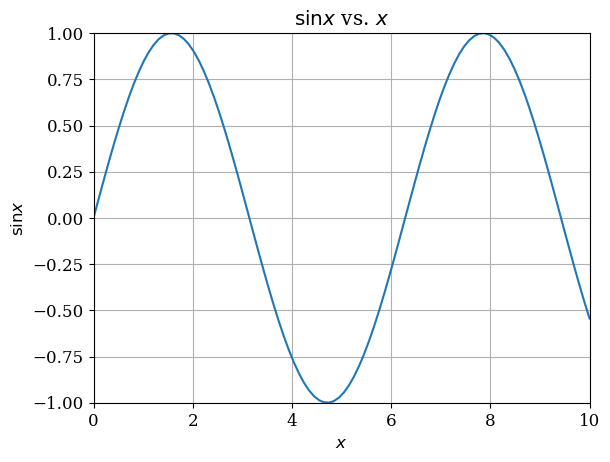

In [2]:
import numpy as np

x = np.linspace(0,10,100)
y = np.sin(x)

# changing linestyles, markers, color, thickness, font style and size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

plt.plot(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$\sin x$")
plt.grid()
plt.title(r"$\sin x$ vs. $x$")
plt.xlim(0,10)
plt.ylim(-1,1)
plt.show()

### The Hertzsprung-Russell (HR) Diagram 
The HR diagram is the distribution of stars in the magnitude-temperature phase space.  
Download the text file provided in the Github Class Repo named "star.txt".  
Now extract the data using the numpy.loadtxt() function and plot it (as above). Make it a scatter plot.

Text(0.5, 0, 'Temperature')

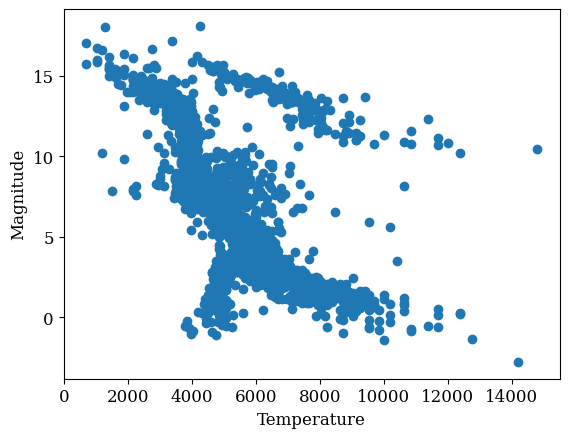

In [3]:
# scatter plot showing the HR diagram
data = np.loadtxt("stars.txt")

plt.scatter(data[:,0],data[:,1])
plt.ylabel("Magnitude")
plt.xlabel("Temperature")

## Subplots

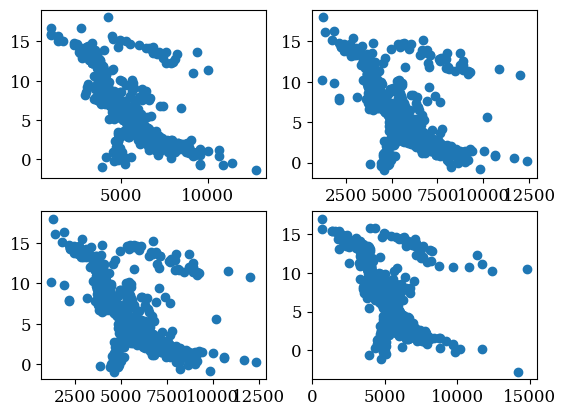

In [4]:
# using the variable axs for multiple Axes
row, col = 2, 2
sub_plot_num = row*col

fig, axs = plt.subplots(2, 2)
plt.rcParams['font.size'] = 10

data = np.loadtxt("stars.txt")

np.random.shuffle(data)    # randomly reshuffling the data
temp = data[:,0]
mag = data[:,1]
# data
datdiv = int(len(data)/sub_plot_num)   # dividing the data into 4 parts to be plotted on 4 subplots
for r in range(row):
    for c in range(col):
        axs[r][c].plot(temp[(r+c)*datdiv:(r+c+1)*datdiv],mag[(r+c)*datdiv:(r+c+1)*datdiv],ls='',marker='o')
        
plt.show()

## Plotting 3D data
There are two ways to plot 3D data in matplotlib: a contour plot or a surface (or projection) plot.

### Plotting the potential of a point mass
The gravitational potential of a point mass is
$$ V \propto -\frac{M}{r} $$
where $r=\sqrt{x^2+y^2}$. Note that at $r=0$, the potential function blows up (for numerical purpose, we will add a smoothing value $\delta$ to avoid this).

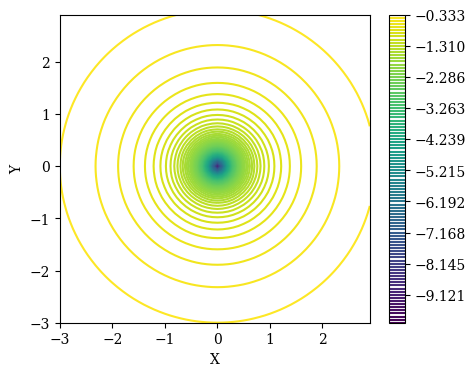

In [5]:
import numpy as np
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D        

# to make 3-D plot, need Axes3D package from matplot tool kit
x = np.arange( -3., 3., 0.1 )
y = np.arange( -3., 3., 0.1 )
X, Y = np.meshgrid(x, y)                 # set coordinate grid matrix, X, Y are 2D array
delta = 0.1                             # smoothing length to avoid singularity
Z = -1./np.sqrt(X*X+Y*Y+delta*delta)   # value of potential (without some constants, and the mass)

# experiment with this, what happens when you add a mass term and increase or decrease it?

fig = plt.figure(figsize=(5,4))
levels=np.arange(Z.min(),Z.max(),(Z.max() - Z.min())/100.)
CS = plt.contour(x,y,Z, levels=levels)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(CS)
plt.show()

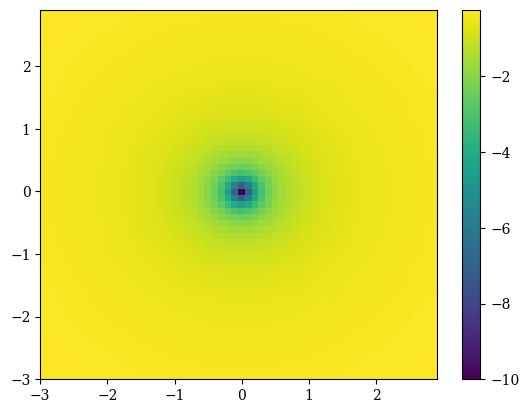

In [6]:
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, Z, vmin=Z.min(), vmax=Z.max(),shading='auto')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)
plt.show()

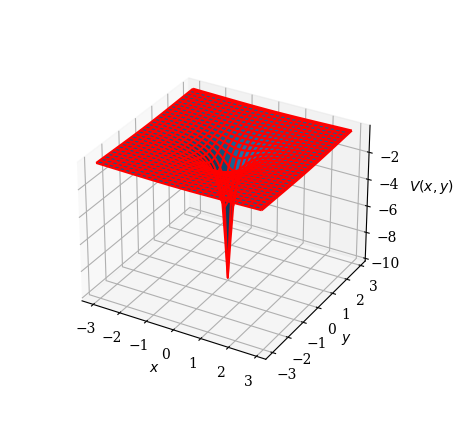

In [7]:
fig = plt.figure(figsize=(12,12))                    # Create figure
#ax = Axes3D(fig)                                   # Plots axes
ax = fig.add_subplot(2,2,1,projection='3d')         # the 2 by 2, 4 subplots, the first one
ax.plot_surface(X, Y, Z)                            # Surface
ax.plot_wireframe(X, Y, Z, color = 'r')             # Add wireframe
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel(r'$V(x,y)$',rotation=0,labelpad=15)
ax.set_box_aspect(aspect=None, zoom=0.78)
plt.show()

## Animation

There are two options: 
* `FuncAnimation` -- generates data for first frame and then modifies the data for each frame to create the animation
* `ArtistAnimation` -- genrates a list of artists that will draw in each frame in the animation  

Former is faster and more efficient, while the latter is more flexible.

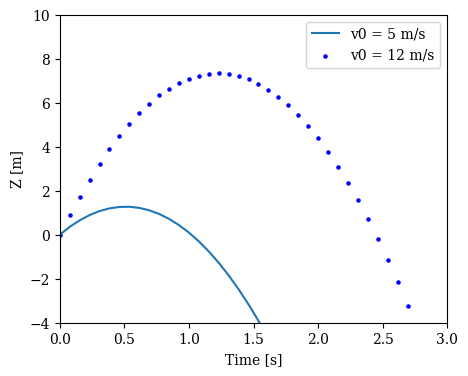

In [8]:
%matplotlib inline                 
from IPython.display import HTML   # ONLY for Jupyter, these 2 lines allow inline animation
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anim

# plot figure as in a static plot to be modified later
fig, ax = plt.subplots(figsize=(5,4))

t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)

# Function animation instance created, figure 'fig' passed to it
# assign a function 'update' that modifies static plot in each iteration
ani = anim.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
# ONLY for Jupyter, these 2 lines allow inline animation
HTML(ani.to_html5_video())      
# save file by providing filename, writer and fps
#ani.save(filename="projectile_animation.mp4", writer="ffmpeg")
#ani.save(filename="projectile_animation.gif", writer="pillow")
#ani.save(filename="projectile_animation.png", writer="html")
#plt.show()

## VPython
Primarily used for 3D interactive animations and plots. Can be installed as
```
conda install -c conda-forge vpython
```
if `conda install vpython` does not work.

### 2D plotting

In [9]:
from vpython import * # must import vpython first
scene = canvas() # with this you don't need to restart kernel each time

f1 = gcurve(color=color.cyan)	# a graphics curve
for x in arange(0, 8.05, 0.1):	# x goes from 0 to 8
    f1.plot(pos=(x,5*cos(2*x)*exp(-0.2*x)))	# plot
    
f2 = gvbars(delta=0.05, color=color.blue) # a bar curve
for x in arange(0, 8.05, 0.1):	# x goes from 0 to 8
    f2.plot(pos=(x,3*cos(2*x)*exp(-0.2*x)))	# plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3D plotting

In [10]:
from vpython import *
Sue=sphere(pos = vector(-1,0,0), radius=0.5, color=color.green) # make the first sphere at pos
Bob=sphere(pos = vector(1,1,0), radius=0.5, color=color.green) # make the second sphere
arrow(pos=Sue.pos,axis=Bob.pos-Sue.pos,color=color.red) # make an arrow pointing from Sue to Bob

### Animations

In [11]:
from vpython import *
scene2 = canvas(title='Ring and Ball',
     width=600, height=300,
     center=vector(0,1,2), forward=vector(0,-0.5,-1), background=color.cyan) # set the camera
# y is pointing up, z is pointing inwards, for the ring, axis is the direction it is pointing
Sue=ring(pos = vector(0,0,0), axis=vector(0,1,0), radius=1, thickness=0.3, color=color.green)
Bob=sphere(pos = vector(0,5,0), radius=0.5, color=color.cyan)
arr=helix(pos=Sue.pos,axis=Bob.pos-Sue.pos,radius=0.5,color=color.red) # plot the helix

r = Bob.pos
while r.y > -5.:
    rate(10)   # slow down the animation
    ##sphere(pos=r, radius=0.5, color=color.green)
    Bob.pos = r
    c=Bob.pos - Sue.pos
    ##c=c/(c.x*c.x+c.y*c.y+c.z*c.z)**0.5
    arr.axis = c  # update the helix length
    r.y = r.y - 0.1 # update Bob the sphere's position

<IPython.core.display.Javascript object>

# Try it yourself

### Total 4 marks (2 marks each)

1. The damped motion of a body of mass $m$ attached to a spring of spring constant $k$ is described by  
$$ 
x(t) = A_0 e^{-\frac{b}{2m}t}\cos(\omega t+\phi) 
$$
The angular frequency of oscillation is given by  
$$ \omega = \sqrt{\omega_0^2 - \left(\frac{b}{2m}\right)^2}$$
where $\omega_0^2=k/m$ is the natural angular frequency of oscillation. Here $b$ is the damping factor, which represents the amount of damping. Assuming $k=m=1$, plot the three cases of underdamped, critically damped and overdamped oscillations of the object (change the value of $b$ to be more than, equal to or less than the critical value, i.e. the value for which the term in the square root vanishes).

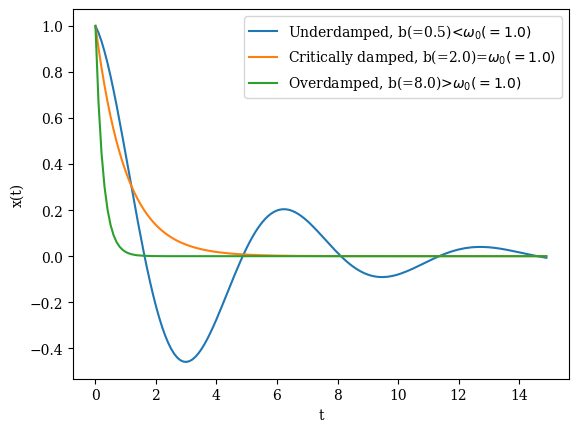

In [12]:
from cmath import sqrt as sqrt   # computes square of negative numbers

A0, phi = 1, 0
k = m = 1
omega0 = np.sqrt(k/m)

def x(t,b):
    omega = sqrt(omega0*omega0 - (b/2/m)**2)
    return A0*np.exp(-b/2/m*t)*np.cos(np.real(omega)*t+phi)

# critcal, underdamped and overdamped values of b
bc = 2*m*omega0
b_ud = bc/4
b_od = 4*bc

t = np.arange(0,15,0.1)
plt.plot(t,x(t,b_ud),label='Underdamped, b(={:.1f})'.format(b_ud)+r'<$\omega_0(={:.1f})$'.format(omega0))
plt.plot(t,x(t,bc),label='Critically damped, b(={:.1f})'.format(bc)+r'=$\omega_0(={:.1f})$'.format(omega0))
plt.plot(t,x(t,b_od),label='Overdamped, b(={:.1f})'.format(b_od)+r'>$\omega_0(={:.1f})$'.format(omega0))
plt.xlabel('t')
plt.ylabel('x(t)')

plt.legend()

2.  A scanning tunneling microscope (STM) is a device that measures the shape of a surface at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling current as a function of position.  The end result is a grid of values that represent the height of the surface and the file "stm.txt" (download from Github folder "data_files") contains just such a grid of values.  Write a program that reads the data contained in the file and makes a density plot of the values.

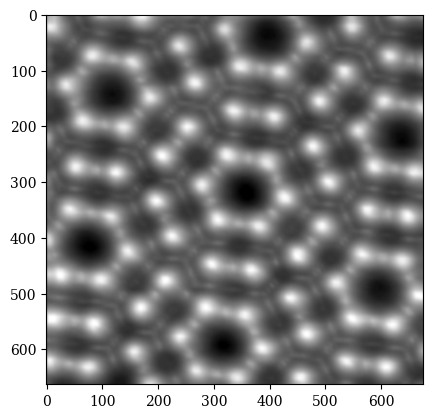

In [13]:
data = np.loadtxt("stm.txt")
plt.imshow(data)
plt.gray()